# Project in Social Data Analysis

Data links:
- https://www.opendata.dk/city-of-copenhagen/trae_basis 
- https://www.opendata.dk/city-of-copenhagen/gadetraeer

Inspiration til vores illustration:
https://www.cloudred.com/labprojects/nyctrees/


### Things we need to do
- How to make a webpage - 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [45]:
# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px

In [4]:
df1 = pd.read_csv("gadetraer.csv")
df1.head()

,FID,id,traeart,slaegt,dansk_navn,slaegtsnavn,planteaar,plantet_halvaar,garantiperioden_udloeber,plantemetode,...,trae_historie,botanisk_interesse,donor,anledning,saerligt_trae,saerlig_trae_bem,bydelsnavn,fredet_trae_foto,vejstatus,wkb_geometry
0,gadetraer.1,18611,Tilia platyphyllos,Tilia sp.,Storbladet lind,Lind,1953.0,Ikke registreret,Ikke registreret,Muld,...,Ikke registreret,Ikke registreret,NaN,NaN,nej,NaN,Vesterbro-Kongens Enghave,NaN,2.0,POINT (12.5370471883976 55.6486340745573)
1,gadetraer.2,21291,Tilia platyphyllos,Tilia sp.,Storbladet lind,Lind,1953.0,Ikke registreret,Ikke registreret,Muld,...,Ikke registreret,Ikke registreret,NaN,NaN,nej,NaN,Vesterbro-Kongens Enghave,NaN,2.0,POINT (12.536925020477707 55.64867988581558)
2,gadetraer.3,21292,Tilia platyphyllos,Tilia sp.,Storbladet lind,Lind,1953.0,Ikke registreret,Ikke registreret,Muld,...,Ikke registreret,Ikke registreret,NaN,NaN,nej,NaN,Vesterbro-Kongens Enghave,NaN,2.0,POINT (12.537000905330974 55.64876361021244)
3,gadetraer.4,21293,Tilia platyphyllos,Tilia sp.,Storbladet lind,Lind,1953.0,Ikke registreret,Ikke registreret,Muld,...,Ikke registreret,Ikke registreret,NaN,NaN,nej,NaN,Vesterbro-Kongens Enghave,NaN,2.0,POINT (12.537133269649273 55.64872321507861)
4,gadetraer.5,21294,Tilia platyphyllos,Tilia sp.,Storbladet lind,Lind,1953.0,Ikke registreret,Ikke registreret,Muld,...,Ikke registreret,Ikke registreret,NaN,NaN,nej,NaN,Vesterbro-Kongens Enghave,NaN,2.0,POINT (12.537399549194998 55.648992732825036)


In [5]:
df1.shape

(19956, 28)

# Analyse af df1, *gadetraer.csv*

In [13]:
traer = df1.groupby(['slaegtsnavn']).count().id
traer = traer.sort_values(ascending=False)

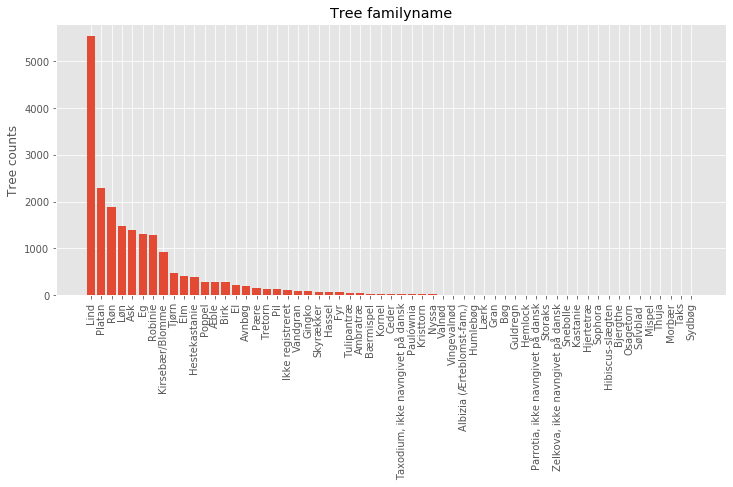

In [20]:
plt.rcParams['figure.figsize'] = (12, 5)
plt.bar(traer.index,traer.values)
plt.title("Tree familyname")
plt.ylabel("Tree counts")
plt.xticks(rotation=90)
plt.show()

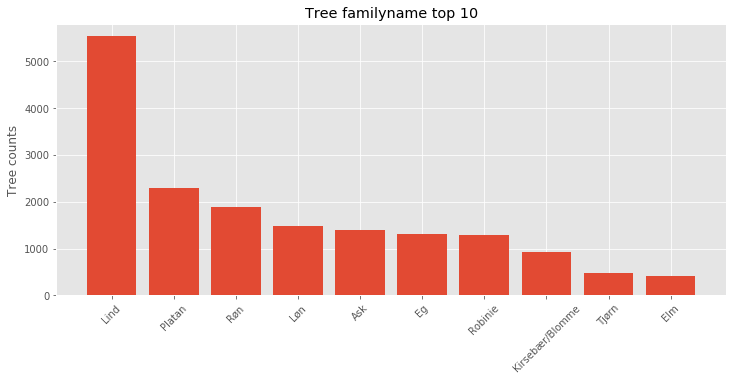

In [21]:
plt.rcParams['figure.figsize'] = (12, 5)
plt.bar(traer.index[:10],traer.values[:10])
plt.title("Tree familyname top 10")
plt.ylabel("Tree counts")
plt.xticks(rotation=45)
plt.show()

In [52]:
fig = go.Figure([go.Bar(x=traer.index[:10], y=traer.values[:10],
                 text=traer.values[:10],textposition="auto")])
fig.show()

In [24]:
byer = df1.groupby(['bydelsnavn']).count().id
byer = byer.sort_values(ascending=False)

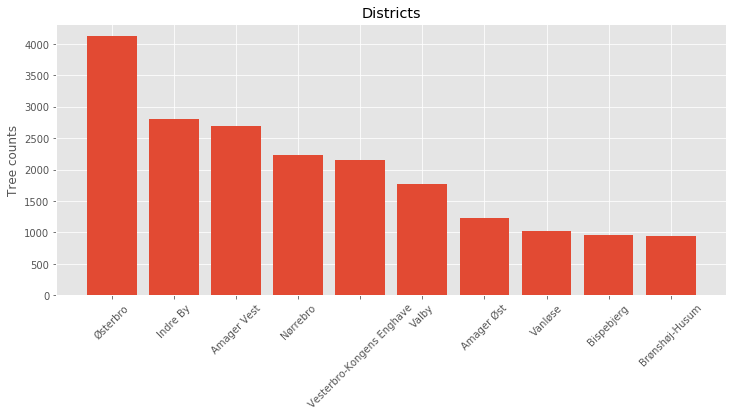

In [25]:
plt.rcParams['figure.figsize'] = (12, 5)
plt.bar(byer.index,byer.values)
plt.title("Districts")
plt.ylabel("Tree counts")
plt.xticks(rotation=45)
plt.show()

Let's make a plot of the top 10 most common trees in each district of Copenhagen

In [38]:
len(districts)


10

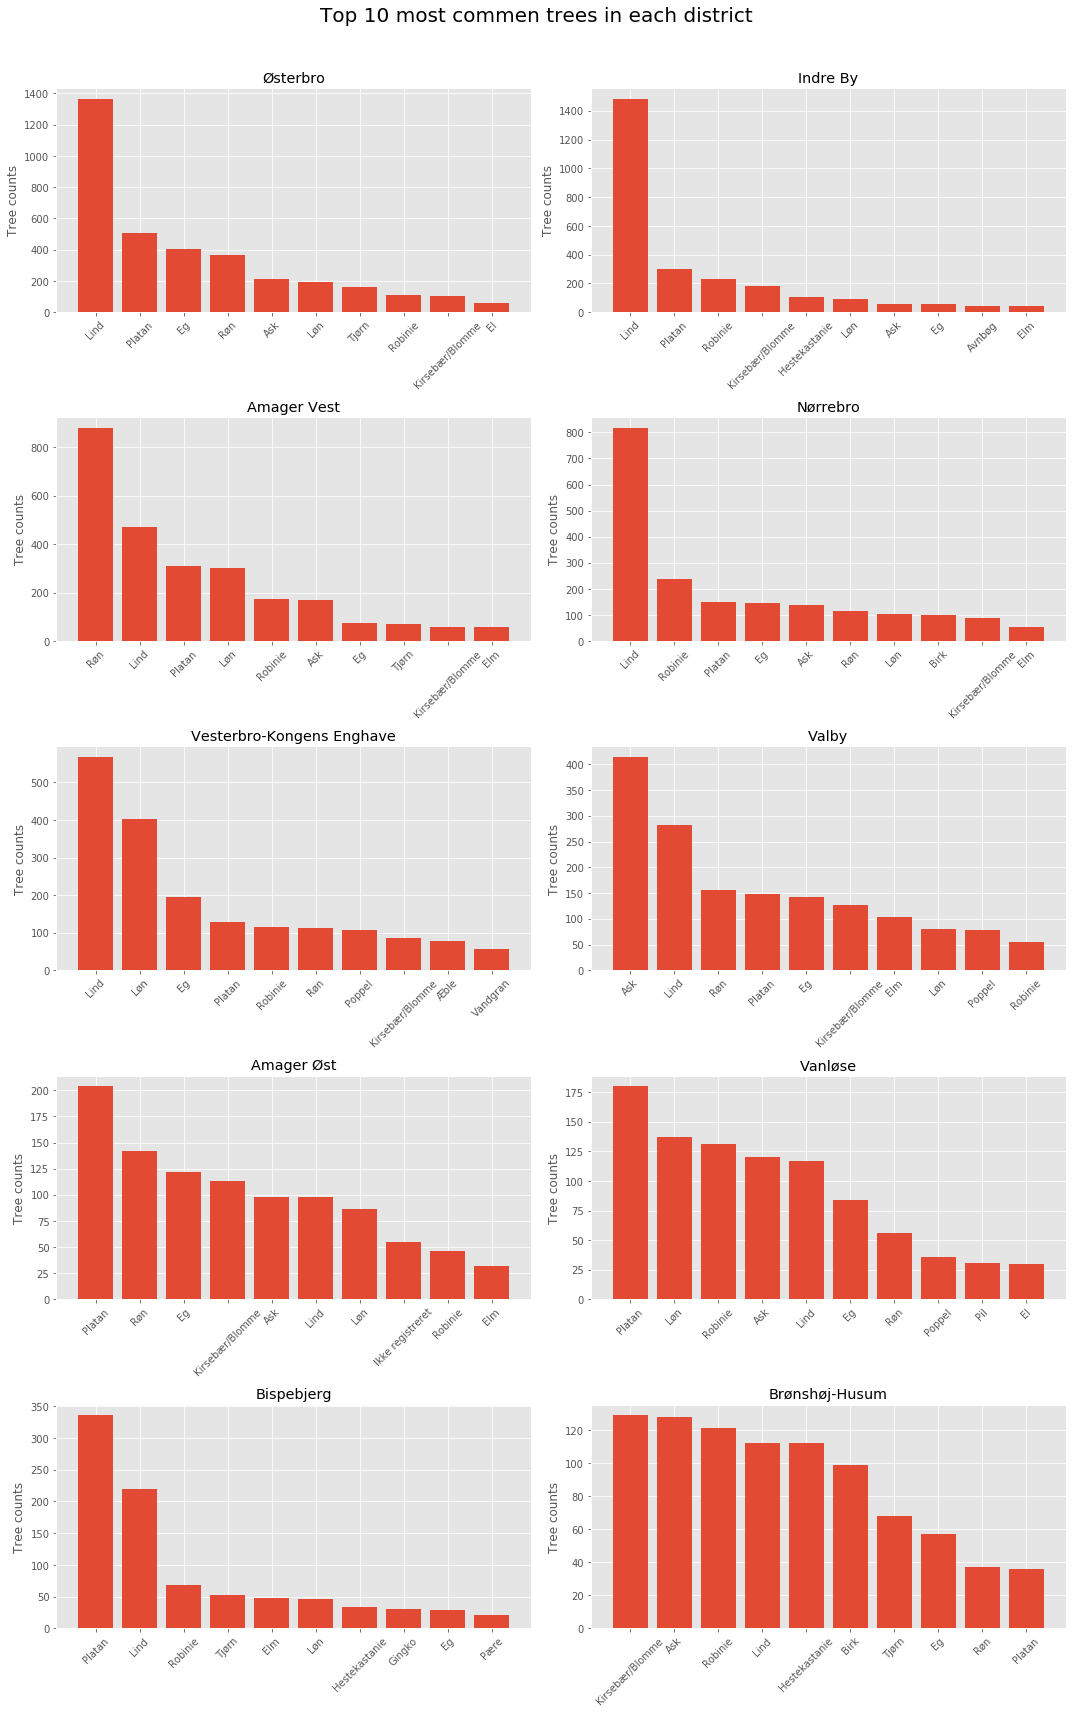

In [43]:
# Define district names
districts = byer.index
# Figure size
plt.rcParams['figure.figsize'] = (15, 25)
# Initialize the figure
fig, axs = plt.subplots(5,2)
p=0

for i in range(0,5):
    for j in range(0,2):
        # slice dataframe to only the districs
        temp = df1[df1['bydelsnavn'] == districts[p]]
        treeTemp = temp.groupby(['slaegtsnavn']).count().id
        treeTemp = treeTemp.sort_values(ascending=False) 
        # Plot
        axs[i,j].bar(treeTemp.index[:10],treeTemp.values[:10])
        axs[i,j].set_title(districts[p])
        axs[i,j].set_ylabel("Tree counts")
        axs[i,j].set_xticklabels(treeTemp.index[:10],rotation=45)
        p += 1

plt.suptitle("Top 10 most commen trees in each district", size = 20)
# Tight fit
plt.tight_layout(rect = [0,0.03,1,0.95])
plt.show()

Lets now make a stacked barchart

In [138]:
temp = df1.groupby(['slaegtsnavn','bydelsnavn']).count()['FID']
temp = temp.unstack()
temp = temp.fillna(0)
temp.head()

bydelsnavn,Amager Vest,Amager Øst,Bispebjerg,Brønshøj-Husum,Indre By,Nørrebro,Valby,Vanløse,Vesterbro-Kongens Enghave,Østerbro
slaegtsnavn,,,,,,,,,,
"Albizia (Ærteblomst-fam,)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
Ambratræ,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,15.0,27.0
Ask,169.0,98.0,9.0,128.0,59.0,139.0,414.0,120.0,48.0,210.0
Avnbøg,5.0,11.0,3.0,0.0,43.0,50.0,33.0,7.0,17.0,24.0
Birk,6.0,20.0,14.0,99.0,1.0,99.0,6.0,6.0,16.0,8.0


## OBS farverne skal lige tilpasses, slet ikke nok her.

In [151]:
x = temp.columns
trees = temp.index

for i in range(0,len(trees)):
    if i == 0:
        fig = go.Figure(go.Bar(x=x, y=temp.iloc[i,:].values, name = trees[i]))
    else:
        fig.add_trace(go.Bar(x=x, y=temp.iloc[i,:].values, name = trees[i]))

fig.update_layout(barmode='stack')
fig.show()

# Analyse af df2, *trae_basis.csv*

In [ ]:
# So all columns can be viewed

pd.set_option('display.max_columns', None)

In [117]:
df2 = pd.read_csv("trae_basis.csv")
df2.head()

,FID,kategori,saerligt_trae,id,type,element,under_element,ny_dm_element,ny_dm_under_element,arbsted_tekst_id,driftsplan_navn,enhedsomraade,traeart,dansk_navn,slaegtsnavn,planteaar,plantet_halvaar,faeldningsaar,bydelsnavn,omraade,vejnavn,vejklasse,vejstatus,fritrumsprofil,stammeomfang,kronediameter,placering,afgraensning,plantemetode,omgivelse,vaekstmedie,beskyttelse,sundhed,skudtilvaekst,andre_vaekstforhold,bevaringsvaerdi,registrering_type,driftstatus_gadetrae,ejer,driftsorganisation,garantiperioden_udloeber,driftsaftale_edoc_nr,fredet_beskyttet_trae,fredningsmyndighed,trae_historie,botanisk_interesse,fredet_trae_foto,donor,anledning,saerlig_trae_bem,fredning_edoc_nr,ikonisk_trae,evighedstrae,bemaerkning,reg_dato,opdateret_dato,r_tidsstempel,r_risikofaktor,r_vaerdi,r_omgivelser,r_registrant,r_registreringsnummer,r_aendringer_rodzone_andet,r_gravearbejde_i_rodzonen,r_gravearbejde_dato,r_graveansvarlig,r_terraenaendring,r_terraenaendring_dato,r_belaegningsaendring_rodzonen,r_belaegningsaendring_dato,r_beplantningsaendring,r_beplantningsaendring_dato,r_aendring_i_graespleje,r_aendring_i_graespleje_dato,r_grundvandsaendring,r_grundvandsaendring_dato,r_sygdomme_skadedyr_andet,r_sygdomme,r_skadedyr,r_stammestruktur_andet,r_tvege,r_flerstammet,r_haeldning,r_kronestruktur_andet,r_ensidig,r_spidse_grenvinkler,r_lange_tunge_grene,r_stammeagtige_sidegrene,r_svag_grensammenhaeftning,r_kronen_andet,r_unormal_bladstoerrelse,r_tidligt_bladtab_hoestfarver,r_grene_mange_saar,r_saar_kritiske_steder_krone,r_daarlig_saarheling_krone,r_doede_grene_braekket_revne,r_revner_i_grene,r_maengden_af_doede_grene,r_stoerrelse_defekte_grene,r_toptoerhed,r_tyndloevet,r_beskaering,r_doedt_trae_staaende,r_stammen_andet,r_doed_bark,r_unormal_bark,r_slimflaad,r_indsunken_bark,r_indvokset_bark,r_store_gamle_saar,r_mange_saar_paa_stammen,r_saar_kritiske_steder_stamme,r_daarlig_saarheling_stamme,r_revner,r_defekter,r_stammeraad_hulhed_aaben,r_stammeraad_hulhed_lukket,r_rodzonen_andet,r_overfladisk_rodnet,r_omvoksende_roedder,r_rodskader,r_rodkageloesning,r_svamp_andet,r_honningsvamp,r_krumskaellet_skaelhat,r_kulsvamp,r_kaempe_poresvamp,r_lakporesvamp,r_skaellet_stilkporesvamp,r_svovlporesvamp,r_toendersvamp,r_oestershat,r_floejlsfod,r_laedersvamp,r_ukendt_svamp,r_ukendt_svamp_beskrivelse,r_birkeporesvamp,r_tilsynsaarsag_andet,r_kronesymptomer,r_struktur,r_svamp,r_skade_paa_roedder,r_raadmaaling_andet,r_raadmaaling_dato,r_naeste_raadmaaling_aar,r_undersoegelse_lift_andet,r_undersoegelse_lift_dato,r_handling_andet,r_handling,r_tid_for_handling,r_beskaeringsaar,r_tilsynsfrekvens,r_naeste_tilsyn_halvaar,r_skader_andet,r_materiel,r_person,r_link_til_edoc_sag,r_generelt_beplantning_andet,r_handling_for_beplantning,r_img01,r_img02,r_img03,r_img04,r_img05,r_img06,r_img07,r_img08,r_img09,r_img10,r_img11,r_img12,r_img13,r_img14,r_img15,torso_hoejde,torso_omkreds,torso_stamme,torso_sidst_stynet,torso_frekvens_styning,torso_naeste_styning,torso_skaeres_ned_til,torso_bemaerkning,wkb_geometry
0,trae_basis.1,gadetræ,nej,18611,2 Træer,2.3 Parktræer,NaN,Gadetræer,Gadetræ,Gadet_Gadet_3421,Gadetræer Vesterbro-Kgs Enghave,Valby,Tilia platyphyllos,Storbladet lind,Lind,1953.0,Ikke registreret,Ikke registreret,Vesterbro-Kongens Enghave,Center Drift Syd CDS,Scandiagade,regional vej,Kommunevej,"4,5 m",30 - 40,Ikke registreret,Midterrabat,Med kant,Muld,Græs,> 15 m2,Ikke registreret,God,Ikke registreret,NaN,Ikke registreret,Gadetræ registreret før sommer 2009,Ikke registreret,TMF,TMF-Byens Drift,Ikke registreret,NaN,Ikke registreret,Ikke registreret,Ikke registreret,Ikke registreret,NaN,NaN,NaN,NaN,NaN,NaN,Ikke registreret,NaN,2007-09-21T00:00:00,2020-02-11T09:34:00.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [111]:
df2.shape

(59627, 183)

In [118]:
traer = df2.groupby(['slaegtsnavn']).count().id
traer = traer.sort_values(ascending=False)

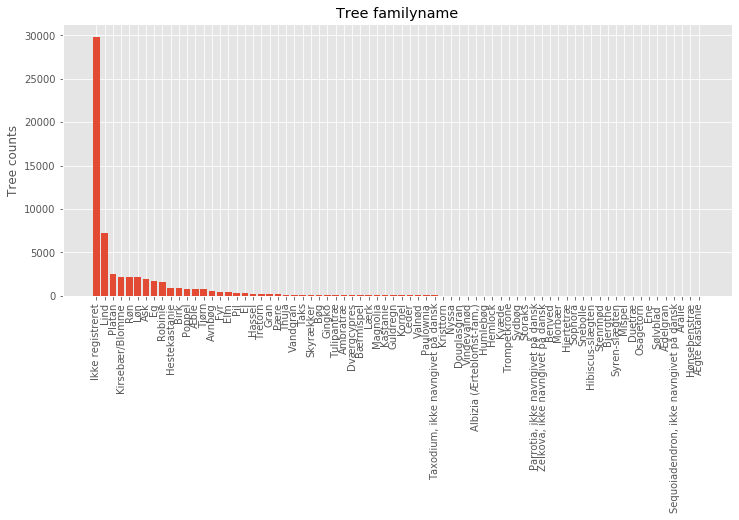

In [119]:
plt.rcParams['figure.figsize'] = (12, 5)
plt.bar(traer.index,traer.values)
plt.title("Tree familyname")
plt.ylabel("Tree counts")
plt.xticks(rotation=90)
plt.show()

We can see that there is a lot of trees, looks like if we remove these trees the two datasets might be the same?

In [121]:
df2[df2['slaegtsnavn'] != 'Ikke registreret'].shape

(29790, 183)

This does not appear to be the case, there are still allmost 10.000 more observations in this dataset, so lets remove the none registred trees and start the fun.

In [122]:
df2 = df2[df2['slaegtsnavn'] != 'Ikke registreret']

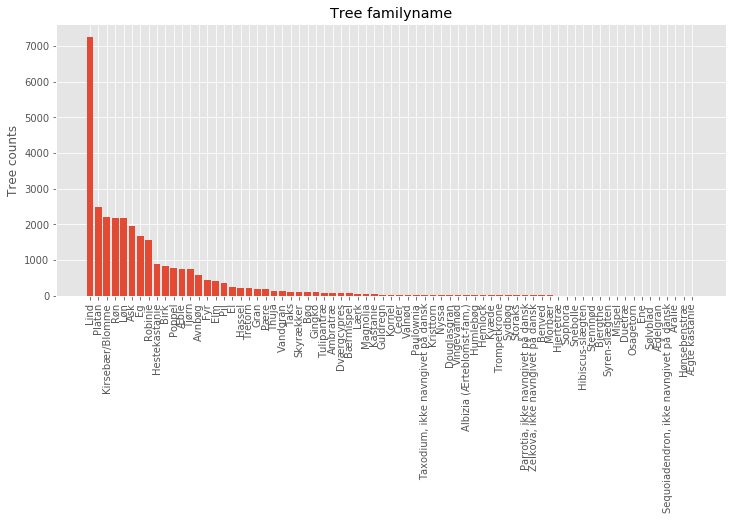

Different tree families: 73


In [124]:
traer = df2.groupby(['slaegtsnavn']).count().id
traer = traer.sort_values(ascending=False)
plt.rcParams['figure.figsize'] = (12, 5)
plt.bar(traer.index,traer.values)
plt.title("Tree familyname")
plt.ylabel("Tree counts")
plt.xticks(rotation=90)
plt.show()
print("Different tree families:", len(traer))

Lets go for that top-10 view again in plotly

In [127]:
fig = go.Figure([go.Bar(x=traer.index[:10], y=traer.values[:10],
                 text=traer.values[:10],textposition="auto")])
fig.show()

And let's see how it is distributed between the districts

In [125]:
byer = df1.groupby(['bydelsnavn']).count().id
byer = byer.sort_values(ascending=False)

In [132]:
fig = go.Figure([go.Bar(x=byer.index, y=byer.values,
                 text=byer.values,textposition="auto")])
fig.update_layout(title = "Tree counts for each district",
                 yaxis_title = "Tree counts")
fig.show()

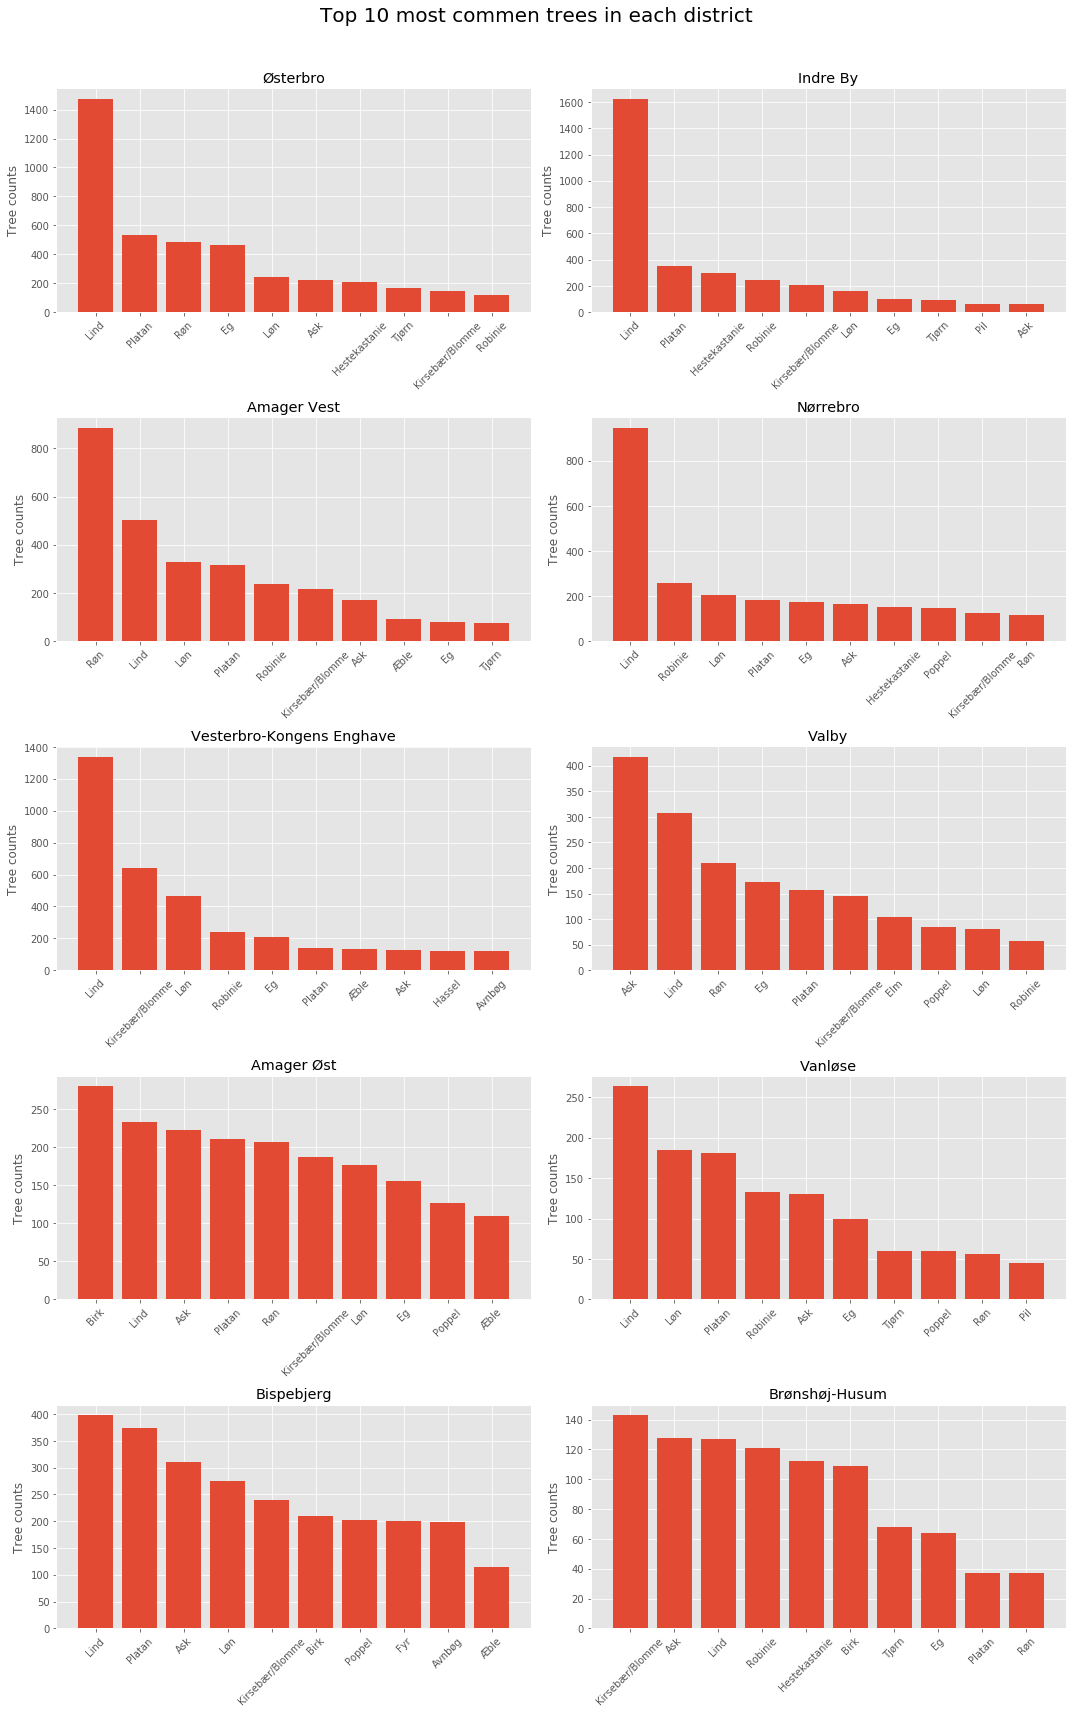

In [133]:
# Define district names
districts = byer.index
# Figure size
plt.rcParams['figure.figsize'] = (15, 25)
# Initialize the figure
fig, axs = plt.subplots(5,2)
p=0

for i in range(0,5):
    for j in range(0,2):
        # slice dataframe to only the districs
        temp = df2[df2['bydelsnavn'] == districts[p]]
        treeTemp = temp.groupby(['slaegtsnavn']).count().id
        treeTemp = treeTemp.sort_values(ascending=False) 
        # Plot
        axs[i,j].bar(treeTemp.index[:10],treeTemp.values[:10])
        axs[i,j].set_title(districts[p])
        axs[i,j].set_ylabel("Tree counts")
        axs[i,j].set_xticklabels(treeTemp.index[:10],rotation=45)
        p += 1

plt.suptitle("Top 10 most commen trees in each district", size = 20)
# Tight fit
plt.tight_layout(rect = [0,0.03,1,0.95])
plt.show()